In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import zipfile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import random

In [ ]:
m_val = 4
c_val = 3

X = np.arange(1,100,1)
y_f = np.vectorize(lambda x: x *(m_val) + c_val)
y = y_f(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def step(theta, alpha, X, y):

    sumA = 0
    sumB = 0
    for i in range(0, len(X)):
        sumA+= (theta[0]*X[i] + theta[1] - y[i])*X[i]
        sumB+= theta[0]*X[i] + theta[1] - y[i]
    sumA = sumA/len(X)
    sumB = sumB/len(X)

    theta[0] = theta[0] - alpha*sumA
    theta[1] = theta[1] - alpha*sumB
    return theta


def manualLinearReg(X, y, n_iters):
    alpha = 0.001
    theta = [0,0]

    for i in range(0, n_iters):
        theta = step(theta, alpha, X, y)
    return theta

In [ ]:
def compute_accuracy(X, y, theta):
    m = len(X)
    predictions = [theta[0] * X[i] + theta[1] for i in range(m)]  # Predicted values
    mse = np.mean([(predictions[i] - y[i]) ** 2 for i in range(m)])  # MSE
    return mse

In [ ]:
def manualLinearReg(X, y, n_iters):
    alpha = 0.0001  # Learning rate
    theta = [1, 1]  # Initialize parameters (slope, intercept)

    for j in range(0,n_iters):
        m = len(X)  # Number of samples
        sumA = 0
        sumB = 0

        # Update gradients
        for i in range(m):
            error = (theta[0] * X[i] + theta[1]) - y[i]
            sumA += error * X[i]  # Gradient for slope
            sumB += error          # Gradient for intercept

        # Average the gradients
        sumA /= m
        sumB /= m
        print(sumA,sumB,m)

        # Update parameters
        theta[0] = theta[0] - alpha * sumA
        theta[1] = theta[1] - alpha * sumB
        # print(f"Iteration {j+1}: Slope: {theta[0]}, Intercept: {theta[1]}")

    # print(f"Final parameters: Slope: {theta[0]}, Intercept: {theta[1]}")
    return theta


In [ ]:
def manualLinearReg(X_b, y, n_iterations, learning_rate):
    theta = np.random.randn(2, 1)
    m = X_b.shape[0]  # 2 because we have one feature + bias
    loss_values = []

    # Gradient descent loop
    for iteration in range(n_iterations):
        predictions = X_b.dot(theta)  # Predicted values
        errors = predictions - y  # Errors
        loss = (1 / m) * np.sum(errors**2)  # Mean squared error loss
        loss_values.append(loss)

        gradients = 2 / m * X_b.T.dot(errors)  # Compute gradients
        theta -= learning_rate * gradients  # Update weights

    # Final parameters
    print("Learned parameters (theta):", theta.ravel())

    # Plot the loss function
    plt.figure(figsize=(10, 6))
    plt.plot(range(n_iterations), loss_values, label="Loss")
    plt.yscale('log')
    plt.xlabel("Iteration")
    plt.ylabel("Loss (MSE)")
    plt.title("Loss Function During Training")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions
    y_pred = X_b.dot(theta)

    # Visualize the result
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", label="Data points")
    plt.plot(X, y_pred, color="red", label="Regression line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return theta

Learned parameters (theta): [3.99835673 3.09616421]


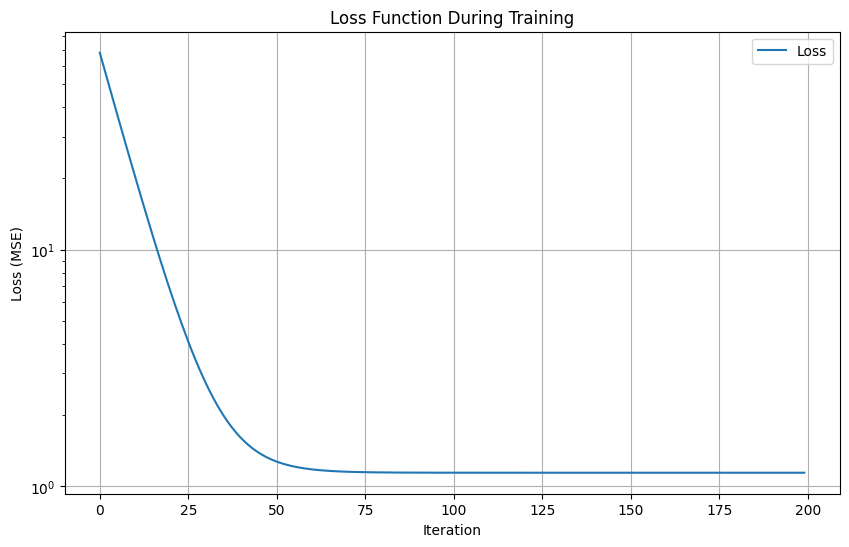

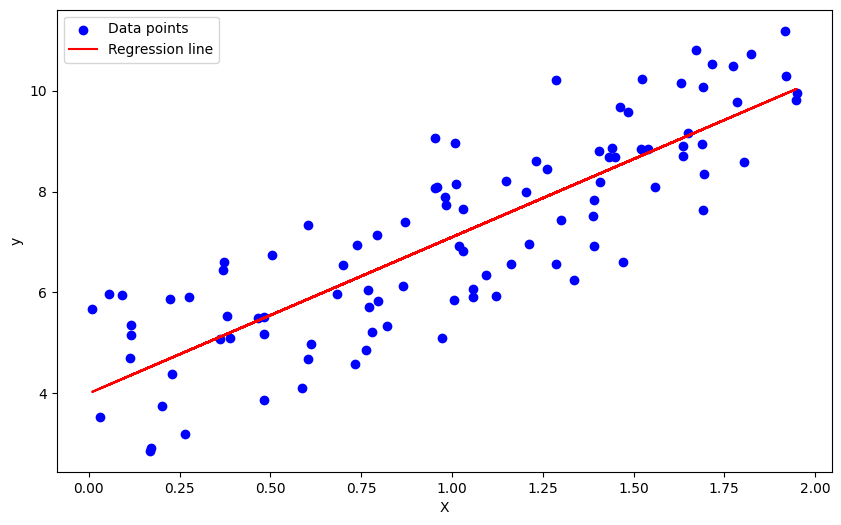

array([[3.99835673],
       [3.09616421]])

In [ ]:
X = 2 * np.random.rand(100, 1)
y_b = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

learning_rate = 0.445  # Learning rate
manualLinearReg(X_b,y_b,200,learning_rate)

In [ ]:
np.random.rand(100, 1)

array([[0.07882161],
       [0.74209078],
       [0.93990161],
       [0.47518019],
       [0.60788894],
       [0.69469276],
       [0.7091961 ],
       [0.61365507],
       [0.30388934],
       [0.50296565],
       [0.82182104],
       [0.98164693],
       [0.91836483],
       [0.81727146],
       [0.63530671],
       [0.72468652],
       [0.6052313 ],
       [0.70700452],
       [0.34886875],
       [0.14868431],
       [0.76379824],
       [0.73776834],
       [0.44702854],
       [0.63758804],
       [0.70947572],
       [0.3833997 ],
       [0.63734375],
       [0.10503551],
       [0.07909176],
       [0.88610392],
       [0.42571385],
       [0.5329133 ],
       [0.54843047],
       [0.17137082],
       [0.07264351],
       [0.90187742],
       [0.67297206],
       [0.54240583],
       [0.71010435],
       [0.2051371 ],
       [0.53907808],
       [0.70044803],
       [0.33211466],
       [0.12693331],
       [0.08503642],
       [0.42044991],
       [0.5125722 ],
       [0.517

In [ ]:
theta = manualLinearReg(X,y,5000)
print(theta)
compute_accuracy(X_test,y_test,theta)

Streaming output truncated to the last 5000 lines.
-6715.99 -101.73479999999999 99
-4488.011309333334 -68.14467651999999 99
-2999.146835021843 -45.69780550568132 99
-2004.2013123787365 -30.697501550021535 99
-1339.3210562653728 -20.67342523797285 99
-895.009538811166 -13.97475261412217 99
-598.0948346757265 -9.498307444804945 99
-399.67922297105383 -6.506883440681836 99
-267.0864129351181 -4.50783663748251 99
-178.48021346178285 -3.1719537891431666 99
-119.26841622801163 -2.2792355264553232 99
-79.69966200142083 -1.682665521762599 99
-53.25752744334014 -1.2839989452033096 99
-35.58736084657236 -1.0175829080920769 99
-23.779131584584764 -0.839544345568399 99
-15.888188553970227 -0.7205647332109272 99
-10.615003193239248 -0.6410517339677823 99
-7.091155208811841 -0.587912612828191 99
-4.736315834825236 -0.552398045522851 99
-3.1626757593789674 -0.5286612265441484 99
-2.111078326385508 -0.5127949816245984 99
-1.4083400398941552 -0.5021883104945284 99
-0.9387296517760507 -0.495096391463997

0.8716235379204182

In [ ]:
for i in zip(X_train,y_train):
    print(i)

(50, 203)
(71, 287)
(69, 279)
(16, 67)
(40, 163)
(34, 139)
(10, 43)
(82, 331)
(12, 51)
(66, 267)
(95, 383)
(31, 127)
(29, 119)
(90, 363)
(6, 27)
(46, 187)
(70, 283)
(36, 147)
(17, 71)
(73, 295)
(35, 143)
(8, 35)
(56, 227)
(28, 115)
(20, 83)
(81, 327)
(26, 107)
(54, 219)
(14, 59)
(25, 103)
(4, 19)
(18, 75)
(39, 159)
(9, 39)
(78, 315)
(7, 31)
(80, 323)
(37, 151)
(92, 371)
(57, 231)
(99, 399)
(55, 223)
(44, 179)
(51, 207)
(67, 271)
(47, 191)
(68, 275)
(62, 251)
(97, 391)
(79, 319)
(42, 171)
(59, 239)
(49, 199)
(86, 347)
(58, 235)
(76, 307)
(33, 135)
(94, 379)
(60, 243)
(64, 259)
(84, 339)
(38, 155)
(30, 123)
(2, 11)
(53, 215)
(22, 91)
(3, 15)
(24, 99)
(88, 355)
(91, 367)
(75, 303)
(87, 351)
(83, 335)
(21, 87)
(61, 247)
(72, 291)
(15, 63)
(93, 375)
(52, 211)
